In [1]:
# importing libaries

import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io

In [2]:
# Define the LSTM model
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()

        self.hidden_size = hidden_size

        self.lstm = nn.LSTM(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x, hidden):
        output, hidden = self.lstm(x, hidden)
        output = self.fc(output)
        return output, hidden


In [3]:
# Toy problem data
input_size = 256  # number of columns in a dataset
hidden_size = 32  # number of neurons
output_size = 256  
sequence_length = 160  # number of sequences/ number of rows
batch_size = 1
num_epochs = 30000

In [4]:
# Load the .mat file
v_data = scipy.io.loadmat('v.mat')
h_data = scipy.io.loadmat('h.mat')
x_data = scipy.io.loadmat('x.mat')

In [5]:
x = x_data['X']
u = h_data['h']

In [6]:
# Set random seed for reproducibility
torch.manual_seed(42)

In [7]:
input_data = u[0:160,:]
target_data = u[1:161, :]

test_data = u[160, :]
#test_target = u[161:201, :]

print("test data shape", test_data.shape)
#print("test target shape", test_target.shape)

print("input data shape",input_data.shape)
print("Target data shape",target_data.shape)

test data shape (256,)
input data shape (160, 256)
Target data shape (160, 256)


In [8]:
# Convert data to tensors
input_tensor = torch.tensor(input_data).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data).view(batch_size, sequence_length, output_size).float()

print("input tensor shape",input_tensor.shape)
print("Target tensor shape",target_tensor.shape)

input tensor shape torch.Size([1, 160, 256])
Target tensor shape torch.Size([1, 160, 256])


In [9]:
# Convert test data to tensors
test_tensor = torch.tensor(test_data).view(batch_size, 1, input_size).float()
#test_target_tensor = torch.tensor(test_target).view(batch_size, 40, output_size).float()


In [10]:
# Create LSTM instance
lstm = LSTM(input_size, hidden_size, output_size)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(lstm.parameters(), lr=0.01)

# Training loop
for epoch in range(num_epochs):
    # Set initial hidden state and cell state
    hidden = torch.zeros(1, batch_size, hidden_size)
    cell = torch.zeros(1, batch_size, hidden_size)

    # Forward pass
    output, (hidden, cell) = lstm(input_tensor, (hidden, cell))
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')


Epoch: 10/30000, Loss: 0.17706659
Epoch: 20/30000, Loss: 0.04944223
Epoch: 30/30000, Loss: 0.03826120
Epoch: 40/30000, Loss: 0.03608983
Epoch: 50/30000, Loss: 0.03149891
Epoch: 60/30000, Loss: 0.03100103
Epoch: 70/30000, Loss: 0.03076473
Epoch: 80/30000, Loss: 0.03058243
Epoch: 90/30000, Loss: 0.03055021
Epoch: 100/30000, Loss: 0.03016698
Epoch: 110/30000, Loss: 0.02829106
Epoch: 120/30000, Loss: 0.02481548
Epoch: 130/30000, Loss: 0.02091661
Epoch: 140/30000, Loss: 0.01758108
Epoch: 150/30000, Loss: 0.01504118
Epoch: 160/30000, Loss: 0.01308300
Epoch: 170/30000, Loss: 0.01153052
Epoch: 180/30000, Loss: 0.01026766
Epoch: 190/30000, Loss: 0.00921789
Epoch: 200/30000, Loss: 0.00832881
Epoch: 210/30000, Loss: 0.00756419
Epoch: 220/30000, Loss: 0.00689842
Epoch: 230/30000, Loss: 0.00631265
Epoch: 240/30000, Loss: 0.00579174
Epoch: 250/30000, Loss: 0.00531701
Epoch: 260/30000, Loss: 0.00481365
Epoch: 270/30000, Loss: 0.00390480
Epoch: 280/30000, Loss: 0.00243327
Epoch: 290/30000, Loss: 0.001

Epoch: 2320/30000, Loss: 0.00023493
Epoch: 2330/30000, Loss: 0.00023256
Epoch: 2340/30000, Loss: 0.00023050
Epoch: 2350/30000, Loss: 0.00023062
Epoch: 2360/30000, Loss: 0.00023111
Epoch: 2370/30000, Loss: 0.00023902
Epoch: 2380/30000, Loss: 0.00041539
Epoch: 2390/30000, Loss: 0.00025054
Epoch: 2400/30000, Loss: 0.00025071
Epoch: 2410/30000, Loss: 0.00023557
Epoch: 2420/30000, Loss: 0.00022752
Epoch: 2430/30000, Loss: 0.00022690
Epoch: 2440/30000, Loss: 0.00022570
Epoch: 2450/30000, Loss: 0.00022543
Epoch: 2460/30000, Loss: 0.00022557
Epoch: 2470/30000, Loss: 0.00022642
Epoch: 2480/30000, Loss: 0.00022697
Epoch: 2490/30000, Loss: 0.00022783
Epoch: 2500/30000, Loss: 0.00022640
Epoch: 2510/30000, Loss: 0.00022591
Epoch: 2520/30000, Loss: 0.00022445
Epoch: 2530/30000, Loss: 0.00022310
Epoch: 2540/30000, Loss: 0.00042690
Epoch: 2550/30000, Loss: 0.00026674
Epoch: 2560/30000, Loss: 0.00022820
Epoch: 2570/30000, Loss: 0.00022278
Epoch: 2580/30000, Loss: 0.00022070
Epoch: 2590/30000, Loss: 0.0

Epoch: 4600/30000, Loss: 0.00017187
Epoch: 4610/30000, Loss: 0.00014230
Epoch: 4620/30000, Loss: 0.00013866
Epoch: 4630/30000, Loss: 0.00014027
Epoch: 4640/30000, Loss: 0.00014047
Epoch: 4650/30000, Loss: 0.00014196
Epoch: 4660/30000, Loss: 0.00013998
Epoch: 4670/30000, Loss: 0.00014278
Epoch: 4680/30000, Loss: 0.00013946
Epoch: 4690/30000, Loss: 0.00013907
Epoch: 4700/30000, Loss: 0.00014417
Epoch: 4710/30000, Loss: 0.00048909
Epoch: 4720/30000, Loss: 0.00023746
Epoch: 4730/30000, Loss: 0.00018814
Epoch: 4740/30000, Loss: 0.00013825
Epoch: 4750/30000, Loss: 0.00013937
Epoch: 4760/30000, Loss: 0.00013290
Epoch: 4770/30000, Loss: 0.00013349
Epoch: 4780/30000, Loss: 0.00013442
Epoch: 4790/30000, Loss: 0.00013761
Epoch: 4800/30000, Loss: 0.00013550
Epoch: 4810/30000, Loss: 0.00013688
Epoch: 4820/30000, Loss: 0.00014134
Epoch: 4830/30000, Loss: 0.00014404
Epoch: 4840/30000, Loss: 0.00018392
Epoch: 4850/30000, Loss: 0.00018478
Epoch: 4860/30000, Loss: 0.00013808
Epoch: 4870/30000, Loss: 0.0

Epoch: 6880/30000, Loss: 0.00007695
Epoch: 6890/30000, Loss: 0.00007156
Epoch: 6900/30000, Loss: 0.00006950
Epoch: 6910/30000, Loss: 0.00006880
Epoch: 6920/30000, Loss: 0.00007075
Epoch: 6930/30000, Loss: 0.00007080
Epoch: 6940/30000, Loss: 0.00007596
Epoch: 6950/30000, Loss: 0.00012802
Epoch: 6960/30000, Loss: 0.00015224
Epoch: 6970/30000, Loss: 0.00010804
Epoch: 6980/30000, Loss: 0.00007929
Epoch: 6990/30000, Loss: 0.00007213
Epoch: 7000/30000, Loss: 0.00007123
Epoch: 7010/30000, Loss: 0.00006821
Epoch: 7020/30000, Loss: 0.00006805
Epoch: 7030/30000, Loss: 0.00007375
Epoch: 7040/30000, Loss: 0.00015502
Epoch: 7050/30000, Loss: 0.00010184
Epoch: 7060/30000, Loss: 0.00009751
Epoch: 7070/30000, Loss: 0.00007919
Epoch: 7080/30000, Loss: 0.00007113
Epoch: 7090/30000, Loss: 0.00006832
Epoch: 7100/30000, Loss: 0.00006841
Epoch: 7110/30000, Loss: 0.00008944
Epoch: 7120/30000, Loss: 0.00011836
Epoch: 7130/30000, Loss: 0.00007397
Epoch: 7140/30000, Loss: 0.00009842
Epoch: 7150/30000, Loss: 0.0

Epoch: 9160/30000, Loss: 0.00005733
Epoch: 9170/30000, Loss: 0.00005610
Epoch: 9180/30000, Loss: 0.00005448
Epoch: 9190/30000, Loss: 0.00005705
Epoch: 9200/30000, Loss: 0.00005766
Epoch: 9210/30000, Loss: 0.00013910
Epoch: 9220/30000, Loss: 0.00010384
Epoch: 9230/30000, Loss: 0.00009700
Epoch: 9240/30000, Loss: 0.00006006
Epoch: 9250/30000, Loss: 0.00005832
Epoch: 9260/30000, Loss: 0.00005844
Epoch: 9270/30000, Loss: 0.00005673
Epoch: 9280/30000, Loss: 0.00007986
Epoch: 9290/30000, Loss: 0.00010781
Epoch: 9300/30000, Loss: 0.00007303
Epoch: 9310/30000, Loss: 0.00007235
Epoch: 9320/30000, Loss: 0.00005760
Epoch: 9330/30000, Loss: 0.00006318
Epoch: 9340/30000, Loss: 0.00013612
Epoch: 9350/30000, Loss: 0.00006604
Epoch: 9360/30000, Loss: 0.00006024
Epoch: 9370/30000, Loss: 0.00005714
Epoch: 9380/30000, Loss: 0.00005672
Epoch: 9390/30000, Loss: 0.00005841
Epoch: 9400/30000, Loss: 0.00006695
Epoch: 9410/30000, Loss: 0.00023835
Epoch: 9420/30000, Loss: 0.00011379
Epoch: 9430/30000, Loss: 0.0

Epoch: 11400/30000, Loss: 0.00017695
Epoch: 11410/30000, Loss: 0.00008929
Epoch: 11420/30000, Loss: 0.00006640
Epoch: 11430/30000, Loss: 0.00005891
Epoch: 11440/30000, Loss: 0.00005384
Epoch: 11450/30000, Loss: 0.00005608
Epoch: 11460/30000, Loss: 0.00005586
Epoch: 11470/30000, Loss: 0.00005852
Epoch: 11480/30000, Loss: 0.00006495
Epoch: 11490/30000, Loss: 0.00032576
Epoch: 11500/30000, Loss: 0.00013601
Epoch: 11510/30000, Loss: 0.00009151
Epoch: 11520/30000, Loss: 0.00005424
Epoch: 11530/30000, Loss: 0.00005825
Epoch: 11540/30000, Loss: 0.00005187
Epoch: 11550/30000, Loss: 0.00005330
Epoch: 11560/30000, Loss: 0.00008887
Epoch: 11570/30000, Loss: 0.00007542
Epoch: 11580/30000, Loss: 0.00006167
Epoch: 11590/30000, Loss: 0.00005618
Epoch: 11600/30000, Loss: 0.00005218
Epoch: 11610/30000, Loss: 0.00005209
Epoch: 11620/30000, Loss: 0.00005509
Epoch: 11630/30000, Loss: 0.00005402
Epoch: 11640/30000, Loss: 0.00006267
Epoch: 11650/30000, Loss: 0.00029170
Epoch: 11660/30000, Loss: 0.00016674
E

Epoch: 13620/30000, Loss: 0.00012508
Epoch: 13630/30000, Loss: 0.00007401
Epoch: 13640/30000, Loss: 0.00005936
Epoch: 13650/30000, Loss: 0.00005123
Epoch: 13660/30000, Loss: 0.00005169
Epoch: 13670/30000, Loss: 0.00010419
Epoch: 13680/30000, Loss: 0.00007488
Epoch: 13690/30000, Loss: 0.00006806
Epoch: 13700/30000, Loss: 0.00005971
Epoch: 13710/30000, Loss: 0.00005393
Epoch: 13720/30000, Loss: 0.00005770
Epoch: 13730/30000, Loss: 0.00014488
Epoch: 13740/30000, Loss: 0.00007720
Epoch: 13750/30000, Loss: 0.00005565
Epoch: 13760/30000, Loss: 0.00005092
Epoch: 13770/30000, Loss: 0.00004985
Epoch: 13780/30000, Loss: 0.00005144
Epoch: 13790/30000, Loss: 0.00005514
Epoch: 13800/30000, Loss: 0.00036582
Epoch: 13810/30000, Loss: 0.00008742
Epoch: 13820/30000, Loss: 0.00008142
Epoch: 13830/30000, Loss: 0.00006352
Epoch: 13840/30000, Loss: 0.00005496
Epoch: 13850/30000, Loss: 0.00007312
Epoch: 13860/30000, Loss: 0.00007299
Epoch: 13870/30000, Loss: 0.00005750
Epoch: 13880/30000, Loss: 0.00005200
E

Epoch: 15840/30000, Loss: 0.00013740
Epoch: 15850/30000, Loss: 0.00014900
Epoch: 15860/30000, Loss: 0.00008554
Epoch: 15870/30000, Loss: 0.00005890
Epoch: 15880/30000, Loss: 0.00005031
Epoch: 15890/30000, Loss: 0.00004931
Epoch: 15900/30000, Loss: 0.00005094
Epoch: 15910/30000, Loss: 0.00007552
Epoch: 15920/30000, Loss: 0.00013232
Epoch: 15930/30000, Loss: 0.00007687
Epoch: 15940/30000, Loss: 0.00005974
Epoch: 15950/30000, Loss: 0.00005515
Epoch: 15960/30000, Loss: 0.00008444
Epoch: 15970/30000, Loss: 0.00007467
Epoch: 15980/30000, Loss: 0.00006884
Epoch: 15990/30000, Loss: 0.00005191
Epoch: 16000/30000, Loss: 0.00004990
Epoch: 16010/30000, Loss: 0.00004995
Epoch: 16020/30000, Loss: 0.00008569
Epoch: 16030/30000, Loss: 0.00011066
Epoch: 16040/30000, Loss: 0.00008005
Epoch: 16050/30000, Loss: 0.00006237
Epoch: 16060/30000, Loss: 0.00005239
Epoch: 16070/30000, Loss: 0.00005422
Epoch: 16080/30000, Loss: 0.00005142
Epoch: 16090/30000, Loss: 0.00005245
Epoch: 16100/30000, Loss: 0.00006410
E

Epoch: 18060/30000, Loss: 0.00005759
Epoch: 18070/30000, Loss: 0.00005286
Epoch: 18080/30000, Loss: 0.00005175
Epoch: 18090/30000, Loss: 0.00005116
Epoch: 18100/30000, Loss: 0.00005683
Epoch: 18110/30000, Loss: 0.00017813
Epoch: 18120/30000, Loss: 0.00009482
Epoch: 18130/30000, Loss: 0.00006430
Epoch: 18140/30000, Loss: 0.00005533
Epoch: 18150/30000, Loss: 0.00006118
Epoch: 18160/30000, Loss: 0.00012944
Epoch: 18170/30000, Loss: 0.00006232
Epoch: 18180/30000, Loss: 0.00005190
Epoch: 18190/30000, Loss: 0.00005090
Epoch: 18200/30000, Loss: 0.00005134
Epoch: 18210/30000, Loss: 0.00005685
Epoch: 18220/30000, Loss: 0.00007572
Epoch: 18230/30000, Loss: 0.00014382
Epoch: 18240/30000, Loss: 0.00007648
Epoch: 18250/30000, Loss: 0.00005814
Epoch: 18260/30000, Loss: 0.00005334
Epoch: 18270/30000, Loss: 0.00006010
Epoch: 18280/30000, Loss: 0.00008942
Epoch: 18290/30000, Loss: 0.00007000
Epoch: 18300/30000, Loss: 0.00006338
Epoch: 18310/30000, Loss: 0.00007887
Epoch: 18320/30000, Loss: 0.00010380
E

Epoch: 20280/30000, Loss: 0.00008664
Epoch: 20290/30000, Loss: 0.00007169
Epoch: 20300/30000, Loss: 0.00005611
Epoch: 20310/30000, Loss: 0.00005381
Epoch: 20320/30000, Loss: 0.00005830
Epoch: 20330/30000, Loss: 0.00009338
Epoch: 20340/30000, Loss: 0.00008235
Epoch: 20350/30000, Loss: 0.00006189
Epoch: 20360/30000, Loss: 0.00005244
Epoch: 20370/30000, Loss: 0.00005192
Epoch: 20380/30000, Loss: 0.00005460
Epoch: 20390/30000, Loss: 0.00006980
Epoch: 20400/30000, Loss: 0.00021575
Epoch: 20410/30000, Loss: 0.00010341
Epoch: 20420/30000, Loss: 0.00006276
Epoch: 20430/30000, Loss: 0.00005255
Epoch: 20440/30000, Loss: 0.00005144
Epoch: 20450/30000, Loss: 0.00005126
Epoch: 20460/30000, Loss: 0.00004956
Epoch: 20470/30000, Loss: 0.00007226
Epoch: 20480/30000, Loss: 0.00015013
Epoch: 20490/30000, Loss: 0.00006548
Epoch: 20500/30000, Loss: 0.00005371
Epoch: 20510/30000, Loss: 0.00004955
Epoch: 20520/30000, Loss: 0.00005027
Epoch: 20530/30000, Loss: 0.00008623
Epoch: 20540/30000, Loss: 0.00010659
E

Epoch: 22500/30000, Loss: 0.00008396
Epoch: 22510/30000, Loss: 0.00005563
Epoch: 22520/30000, Loss: 0.00007324
Epoch: 22530/30000, Loss: 0.00016941
Epoch: 22540/30000, Loss: 0.00007009
Epoch: 22550/30000, Loss: 0.00006294
Epoch: 22560/30000, Loss: 0.00005195
Epoch: 22570/30000, Loss: 0.00005171
Epoch: 22580/30000, Loss: 0.00005134
Epoch: 22590/30000, Loss: 0.00005194
Epoch: 22600/30000, Loss: 0.00005602
Epoch: 22610/30000, Loss: 0.00014672
Epoch: 22620/30000, Loss: 0.00007801
Epoch: 22630/30000, Loss: 0.00005466
Epoch: 22640/30000, Loss: 0.00005336
Epoch: 22650/30000, Loss: 0.00005015
Epoch: 22660/30000, Loss: 0.00004968
Epoch: 22670/30000, Loss: 0.00005117
Epoch: 22680/30000, Loss: 0.00010879
Epoch: 22690/30000, Loss: 0.00008369
Epoch: 22700/30000, Loss: 0.00007791
Epoch: 22710/30000, Loss: 0.00006290
Epoch: 22720/30000, Loss: 0.00005326
Epoch: 22730/30000, Loss: 0.00005257
Epoch: 22740/30000, Loss: 0.00005144
Epoch: 22750/30000, Loss: 0.00005070
Epoch: 22760/30000, Loss: 0.00005300
E

Epoch: 24720/30000, Loss: 0.00005082
Epoch: 24730/30000, Loss: 0.00005177
Epoch: 24740/30000, Loss: 0.00005361
Epoch: 24750/30000, Loss: 0.00006209
Epoch: 24760/30000, Loss: 0.00014608
Epoch: 24770/30000, Loss: 0.00006168
Epoch: 24780/30000, Loss: 0.00005785
Epoch: 24790/30000, Loss: 0.00005135
Epoch: 24800/30000, Loss: 0.00006086
Epoch: 24810/30000, Loss: 0.00005577
Epoch: 24820/30000, Loss: 0.00006273
Epoch: 24830/30000, Loss: 0.00007397
Epoch: 24840/30000, Loss: 0.00008416
Epoch: 24850/30000, Loss: 0.00008137
Epoch: 24860/30000, Loss: 0.00006177
Epoch: 24870/30000, Loss: 0.00005125
Epoch: 24880/30000, Loss: 0.00005034
Epoch: 24890/30000, Loss: 0.00006150
Epoch: 24900/30000, Loss: 0.00013570
Epoch: 24910/30000, Loss: 0.00008981
Epoch: 24920/30000, Loss: 0.00005995
Epoch: 24930/30000, Loss: 0.00005512
Epoch: 24940/30000, Loss: 0.00007199
Epoch: 24950/30000, Loss: 0.00011710
Epoch: 24960/30000, Loss: 0.00006391
Epoch: 24970/30000, Loss: 0.00005295
Epoch: 24980/30000, Loss: 0.00005169
E

Epoch: 26940/30000, Loss: 0.00004962
Epoch: 26950/30000, Loss: 0.00004915
Epoch: 26960/30000, Loss: 0.00005025
Epoch: 26970/30000, Loss: 0.00007136
Epoch: 26980/30000, Loss: 0.00014359
Epoch: 26990/30000, Loss: 0.00006711
Epoch: 27000/30000, Loss: 0.00005234
Epoch: 27010/30000, Loss: 0.00005109
Epoch: 27020/30000, Loss: 0.00006517
Epoch: 27030/30000, Loss: 0.00011650
Epoch: 27040/30000, Loss: 0.00006187
Epoch: 27050/30000, Loss: 0.00005212
Epoch: 27060/30000, Loss: 0.00005044
Epoch: 27070/30000, Loss: 0.00004847
Epoch: 27080/30000, Loss: 0.00005052
Epoch: 27090/30000, Loss: 0.00005855
Epoch: 27100/30000, Loss: 0.00022028
Epoch: 27110/30000, Loss: 0.00012855
Epoch: 27120/30000, Loss: 0.00007124
Epoch: 27130/30000, Loss: 0.00005378
Epoch: 27140/30000, Loss: 0.00005085
Epoch: 27150/30000, Loss: 0.00004983
Epoch: 27160/30000, Loss: 0.00004981
Epoch: 27170/30000, Loss: 0.00005051
Epoch: 27180/30000, Loss: 0.00005435
Epoch: 27190/30000, Loss: 0.00005982
Epoch: 27200/30000, Loss: 0.00008696
E

Epoch: 29160/30000, Loss: 0.00009303
Epoch: 29170/30000, Loss: 0.00007655
Epoch: 29180/30000, Loss: 0.00006171
Epoch: 29190/30000, Loss: 0.00005248
Epoch: 29200/30000, Loss: 0.00004972
Epoch: 29210/30000, Loss: 0.00004975
Epoch: 29220/30000, Loss: 0.00004943
Epoch: 29230/30000, Loss: 0.00007389
Epoch: 29240/30000, Loss: 0.00015961
Epoch: 29250/30000, Loss: 0.00007347
Epoch: 29260/30000, Loss: 0.00005507
Epoch: 29270/30000, Loss: 0.00005375
Epoch: 29280/30000, Loss: 0.00006233
Epoch: 29290/30000, Loss: 0.00005517
Epoch: 29300/30000, Loss: 0.00005162
Epoch: 29310/30000, Loss: 0.00005650
Epoch: 29320/30000, Loss: 0.00009352
Epoch: 29330/30000, Loss: 0.00005856
Epoch: 29340/30000, Loss: 0.00006190
Epoch: 29350/30000, Loss: 0.00021098
Epoch: 29360/30000, Loss: 0.00008717
Epoch: 29370/30000, Loss: 0.00005436
Epoch: 29380/30000, Loss: 0.00005232
Epoch: 29390/30000, Loss: 0.00005157
Epoch: 29400/30000, Loss: 0.00005642
Epoch: 29410/30000, Loss: 0.00005601
Epoch: 29420/30000, Loss: 0.00005877
E

(1, 256)
(1, 201)
(201, 256)


/data/localhome/tkapoor/.local/lib/python3.8/site-packages/numpy/ma/core.py:2820: ComplexWarning: Casting complex values to real discards the imaginary part
  _data = np.array(data, dtype=dtype, copy=copy,
/usr/local/lib/python3.8/dist-packages/matplotlib/contour.py:1180: ComplexWarning: Casting complex values to real discards the imaginary part
  self.levels = np.asarray(levels_arg).astype(np.float64)


<Figure size 432x288 with 0 Axes>

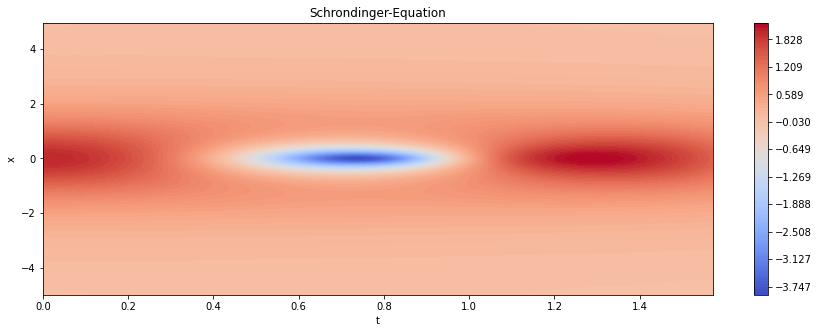

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
from sklearn.model_selection import train_test_split

# Load the .mat file
mat_data = scipy.io.loadmat('NLS.mat')

# Following is the code to plot the data u vs x and t. u is 256*100
# matrix. Use first 75 columns for training and 25 for testing :)

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['tt']
u1 = mat_data['uu']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u1), np.max(u1), 100)

# Plot the contour
plt.figure()
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u1.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Schrondinger-Equation')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

In [12]:
print(test_tensor.shape)
prediction_tensor = torch.zeros(1, 40, 256).float()
print(prediction_tensor.shape)

torch.Size([1, 1, 256])
torch.Size([1, 40, 256])


In [13]:
with torch.no_grad():
    hidden_pred = torch.zeros(1, batch_size, hidden_size)
    cell_pred = torch.zeros(1, batch_size, hidden_size)
    prediction, _ = lstm(test_tensor, (hidden_pred, cell_pred))
    prediction = prediction.view(1, 1, 256).float()
    prediction_tensor[:, 0, :] = prediction
    for i in range(19):
        hidden_pred = torch.zeros(1, batch_size, hidden_size)
        cell_pred = torch.zeros(1, batch_size, hidden_size)
        prediction, _ = lstm(test_tensor, (hidden_pred, cell_pred))
        prediction = prediction.view(1, 1, 256).float()
        prediction_tensor[:, i+1, :] = prediction

### errors

In [14]:
# true solution
h_true = np.abs(u1)
h_true = h_true.T
print(h_true.shape)

(201, 256)


In [15]:
# exact
u_test_full = h_true[161:201, :]
print(u_test_full.shape)

(40, 256)


In [16]:

k1 = (prediction_tensor - u_test_full)**2
u_test_full_tensor = torch.tensor(u_test_full**2)
prediction_tensor.shape

torch.Size([1, 40, 256])

In [17]:
# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean(k1)/ torch.mean(u_test_full_tensor)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.5022126934070535 %


In [18]:
R_abs = torch.max(prediction_tensor-u_test_full)
print(R_abs)

tensor(0.1532, dtype=torch.float64)


### explained variance score

In [19]:
import torch

a = prediction_tensor
b = u_test_full
# Assuming 'a' is your predicted values (model's predictions) and 'b' is the true values (ground truth)
# Make sure 'a' and 'b' are PyTorch tensors
b = torch.tensor(b)
# Calculate the mean of 'b'
mean_b = torch.mean(b)

# Calculate the Explained Variance Score
numerator = torch.var(b - a)  # Variance of the differences between 'b' and 'a'
denominator = torch.var(b)    # Variance of 'b'
evs = 1 - numerator / denominator

print("Explained Variance Score:", evs.item())


Explained Variance Score: 0.2721566391123723


### mean absolute error

In [20]:
R_mean = torch.mean(torch.abs(prediction_tensor - u_test_full))
print(R_mean)

tensor(0.3268, dtype=torch.float64)


In [21]:
prediction_tensor = torch.squeeze(prediction_tensor)
h = np.abs(u)
h.shape

(201, 256)

(256, 1)
(256, 1)


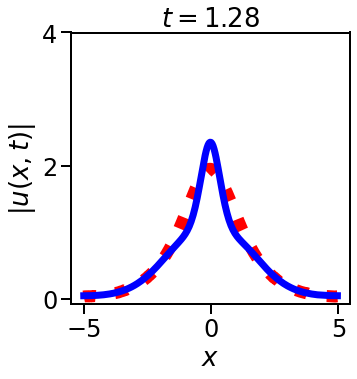

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)

final_time_output = prediction_tensor[-38, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[-38, :].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${|u(x, t)|}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.28}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('LSTM_1.28_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


(256, 1)
(256, 1)


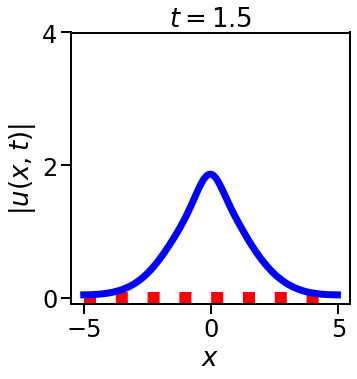

In [23]:
import matplotlib.pyplot as plt
import numpy as np
import torch

# Create the figure and axis objects with reduced width
fig, ax = plt.subplots(figsize=(5, 5))  # You can adjust the width (7 inches) and height (5 inches) as needed

# # Make sure the font is Times Roman
# plt.rcParams['font.family'] = 'Times New Roman'

# # Perform the prediction
# with torch.no_grad():
#     prediction = lem(test_tensor)


final_time_output = prediction_tensor[-3, :]
final_out = final_time_output.detach().numpy().reshape(-1, 1)
final_true = h[-3, :].reshape(-1, 1)
print(final_out.shape)
print(final_true.shape)

# Plot the data with red and blue lines, one with dotted and one with solid style
ax.plot(x.T, final_out, color='red', linestyle='dotted', linewidth=12, label='Prediction')
ax.plot(x.T, final_true, color='blue', linestyle='solid', linewidth=7, label='True')

# Set the axis labels with bold font weight
ax.set_xlabel(r"${x}$", fontsize=26, color='black', fontdict={'weight': 'bold'})
ax.set_ylabel(r"${|u(x, t)|}$", fontsize=26, color='black', fontdict={'weight': 'bold'})

# Set the title with bold font weight
ax.set_title(r"${t = 1.5}$", fontsize=26, color='black', fontweight='bold')

# Set the number of ticks for x-axis and y-axis to 3
ax.set_xticks([-5, 0, 5])
ax.set_yticks([0, 2, 4])

# Set tick labels fontweight to bold and increase font size
ax.tick_params(axis='both', which='major', labelsize=20, width=2, length=10)

# # Set the fontweight for tick labels to bold
# for tick in ax.get_xticklabels() + ax.get_yticklabels():
#     tick.set_weight('bold')

# Set the spines linewidth to bold
ax.spines['top'].set_linewidth(2)
ax.spines['right'].set_linewidth(2)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)


# Increase font size for x and y axis numbers
ax.tick_params(axis='both', which='major', labelsize=24)

# Set the legend
# ax.legend()

plt.savefig('LSTM_1.5_20.pdf', dpi=500, bbox_inches="tight")

# Show the plot
plt.show()


In [24]:
conc_u = torch.squeeze(input_tensor)

In [25]:
concatenated_tensor = torch.cat((conc_u, prediction_tensor), dim=0)

t1 = np.linspace(0, 1.5707 , 200)

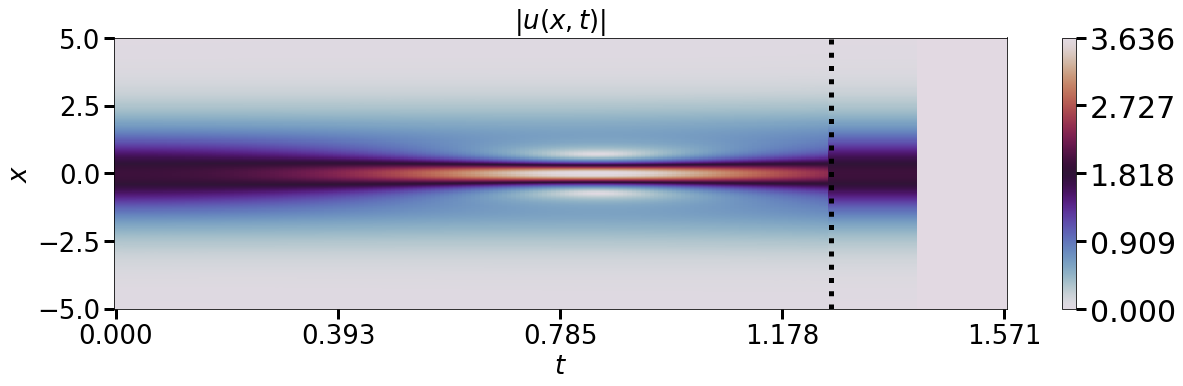

In [26]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FixedLocator

# Assuming you have defined concatenated_tensor as a PyTorch tensor
# concatenated_tensor = torch.cat((tensor1, tensor2), dim=0)

# Convert concatenated_tensor to a NumPy array
concatenated_array = concatenated_tensor.numpy()

# Define custom color levels
x = np.linspace(-5, 5, concatenated_array.shape[1])  # Replace 0 and 1 with your actual x range
t = np.linspace(0, 1.57, concatenated_array.shape[0])  # Replace 0 and 1 with your actual t range
X, T = np.meshgrid(x, t1)

# Define custom color levels using the minimum and maximum from the NumPy array
c_levels = np.linspace(np.min(concatenated_array), np.max(concatenated_array), 400)

# Plot the contour with interpolated data
plt.figure(figsize=(20, 5))
plt.pcolormesh(T, X, concatenated_array, shading='auto', cmap='twilight')

# Set the fontweight for axis labels to regular (not bold)
plt.xlabel("$t$", fontsize=26)
plt.ylabel("$x$", fontsize=26)
plt.title("$|u(x, t)|$", fontsize=26)

# Set tick labels fontweight to regular (not bold) and increase font size
plt.tick_params(axis='both', which='major', labelsize=20, width=3, length=10)

# Set the fontweight for tick labels to regular (not bold)
for tick in plt.gca().get_xticklabels() + plt.gca().get_yticklabels():
    tick.set_weight('normal')

# Set the number of ticks for x-axis and y-axis to 5
num_ticks = 5
x_ticks = np.linspace(np.min(T), np.max(T), num_ticks)
y_ticks = np.linspace(np.min(X), np.max(X), num_ticks)

plt.gca().xaxis.set_major_locator(FixedLocator(x_ticks))
plt.gca().yaxis.set_major_locator(FixedLocator(y_ticks))

cbar1 = plt.colorbar()
# Set the number of ticks for the color bar with uniformly distributed numbers
num_ticks = 5
c_ticks = np.linspace(np.min(concatenated_array), np.max(concatenated_array), num_ticks)
cbar1.set_ticks(c_ticks)

# Set the fontweight and fontsize for color bar tick labels
for t in cbar1.ax.get_yticklabels():
    t.set_weight('normal')
    t.set_fontsize(26)  # Increase the font size for color bar tick labels

# Increase the size of numbers on axis and color bar
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Increase the tick size and width of the color bar
cbar1.ax.tick_params(axis='both', which='major', labelsize=30, width=3,  length=10)

# Add a dotted line at t = 0.8
plt.axvline(x=1.26449, color='black', linestyle='dotted', linewidth=5)

#plt.savefig('Contour_LEM_20.pdf', dpi=500, bbox_inches="tight")
plt.savefig('contour_LSTM_20.jpeg', dpi=500, bbox_inches="tight")
# Show the plot
plt.show()
